In [164]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from data import transforms
from PIL import Image
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
img_size=640
interpolation='bilinear'

In [166]:
fill_color = transforms.resolve_fill_color("mean", transforms.IMAGENET_DEFAULT_MEAN)


In [167]:
image_tfl = [
    #transforms.RandomRotation(rotation=90),
    transforms.ColorTransform(brightness=(0.8,1.5), contrast=(0.8, 1.2), hue=(-0.1, 0.1)),
    transforms.RandomFlip(horizontal=True, prob=0.5),
    transforms.RandomResizePad(target_size=img_size, interpolation=interpolation, scale=(0.5,3.), fill_color=fill_color, repeat=10),
    transforms.ImageToNumpy()
]

In [168]:
image_tf = transforms.Compose(image_tfl)

In [169]:
image_name = "./test_imgs/aug_test.png"


In [170]:
im = Image.open(image_name).convert('RGB')

In [171]:
im.size

(1920, 1080)

In [172]:
np_img = np.array(im, dtype=np.uint8)
np_img = np.moveaxis(np_img, 2, 0)
#torch_img = torch.from_numpy(np_img).to(dtype=torch.float32)


{'bbox': array([[236.54123593, 186.54123593, 246.00288536, 196.00288536]]), 'cls': array([1])}
{'bbox': array([[219.72053052, 129.72053052, 228.50935174, 138.50935174]]), 'cls': array([1])}
{'bbox': array([[196.40255157, 478.92714439, 204.25865363, 486.78324645]]), 'cls': array([1])}
{'bbox': array([[172.75433254, 163.75433254, 179.66450584, 170.66450584]]), 'cls': array([1])}
{'bbox': array([[528.06130938, 483.97166626, 551.10376175, 507.01411864]]), 'cls': array([1])}
{'bbox': array([[278.355191  , 447.1945348 , 291.32939864, 460.16874244]]), 'cls': array([1])}
{'bbox': array([[252.75528502, 352.75528502, 268.62549642, 368.62549642]]), 'cls': array([1])}
{'bbox': array([[297.41070411, 448.74997151, 309.30713227, 460.64639967]]), 'cls': array([1])}
{'bbox': array([[396.0881727, 170.0881727, 415.0516996, 189.0516996]]), 'cls': array([1])}
{'bbox': array([[276.66172495, 140.66172495, 287.72819395, 151.72819395]]), 'cls': array([1])}


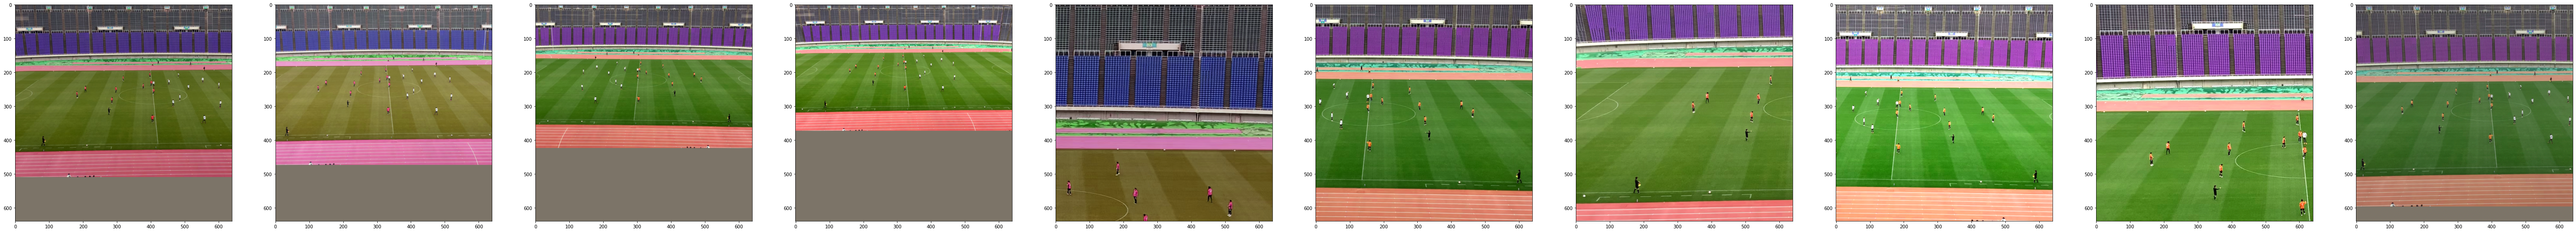

In [183]:
plt.figure(figsize=(100, 200))
for i in range(10):
    aug_img, ann = image_tf(im, {'bbox':np.array([[500,1400,520,1420]]).astype(np.float64), "cls":np.array([1])})
    #aug_img, ann = image_tf(im, {})
    print(ann)
    aug_img = aug_img.transpose((1,2,0))
    plt.subplot(4, 10, i+1)
    plt.imshow(aug_img)
plt.show()